# CMPE 482 Numerical Linear Algebra - Homework 4

In [60]:
%%% Constants %%%
epsilon = 1e-05;

%% removed from session magics.



### 9.3. (a)

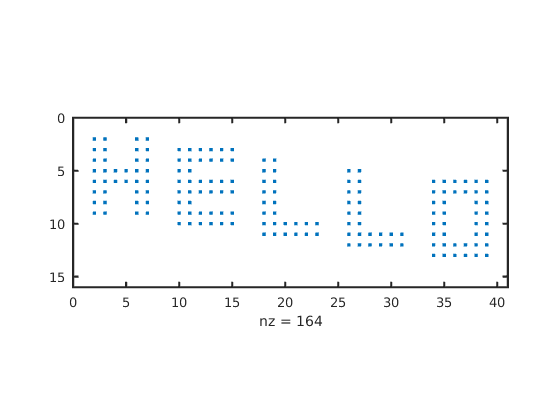

In [61]:
hello = [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
          0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
          0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
          0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
          0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0;
          0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0;
          0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0;
          0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0;
          0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0;
          0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0;
          0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0;
          0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0;
          0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0;
          0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
          0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0];
[m, n] = size(hello);

spy(hello,5);
set(gca, 'linewidth', 1, 'fontsize', 6);

### 9.3. (b)

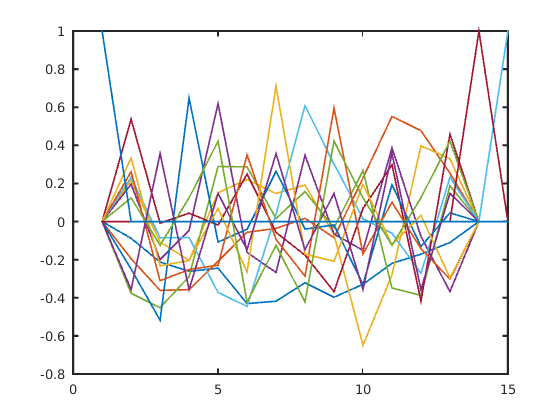

In [62]:
[U,S,V] = svd(hello);
plot(U);
set(gca, 'linewidth', 1, 'fontsize', 6);

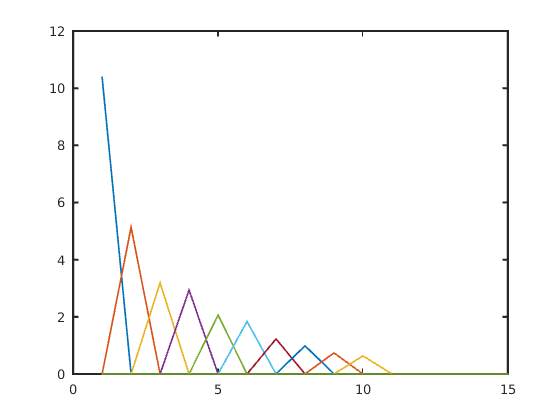

In [63]:
plot(S);
set(gca, 'linewidth', 1, 'fontsize', 6);

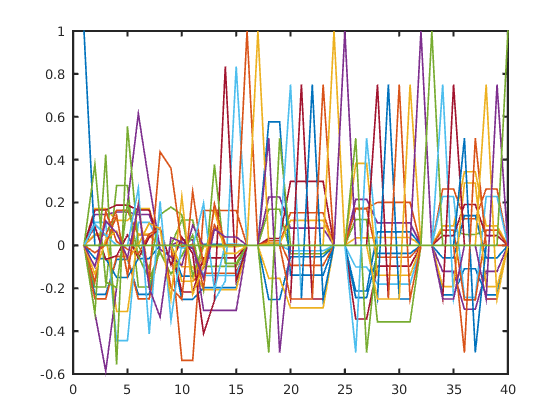

In [64]:
plot(V);
set(gca, 'linewidth', 1, 'fontsize', 6);

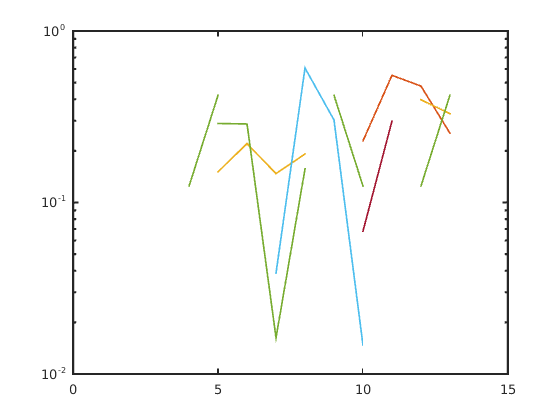

In [65]:
semilogy(U);
set(gca, 'linewidth', 1, 'fontsize', 6);

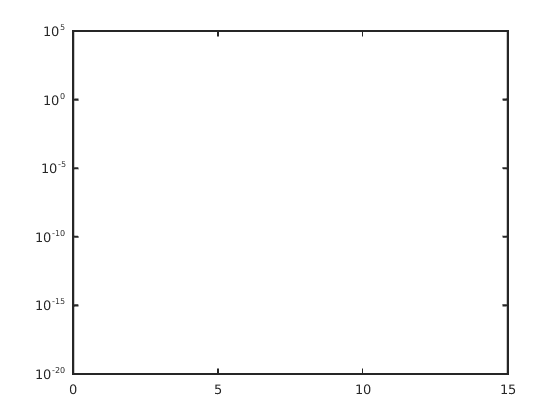

In [66]:
semilogy(S);
set(gca, 'linewidth', 1, 'fontsize', 6);

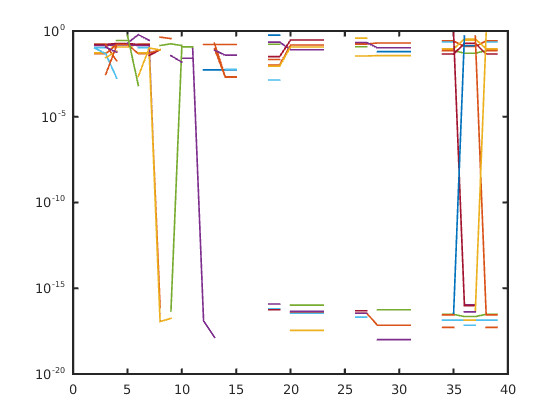

In [67]:
semilogy(V);
set(gca, 'linewidth', 1, 'fontsize', 6);

In [68]:
r=rank(hello); % 10- The number of columns that are not dependent which is in this case the number of columns that are not equivalent
nzc = sum(diag(S)> epsilon); % 10 the number of non zero values on the digonal of S matrix gives the rank.

### 9.3. (c)

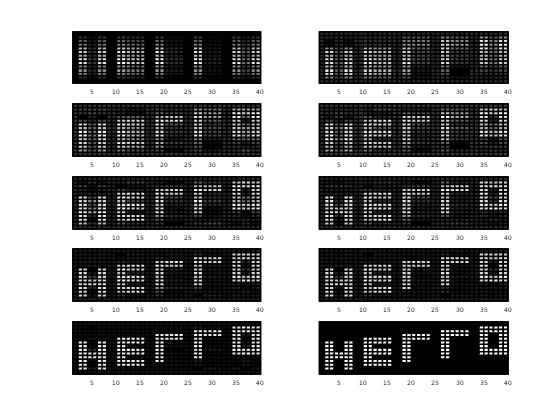

In [69]:
B=zeros(m,n,r);
S_ = S;
f = figure;
colormap(gray);
for i=r:-1:1
    B(:,:,i) = U*S_*V';
    S_(i,i) = 0;
    subplot(5,2,i, 'linewidth', 1, 'fontsize', 4);
    pcolor(B(:,:,i));
    set(gca, 'linewidth', 1, 'fontsize', 3,'ytick',[]);
end

### 10.4.(a)

$\mathbf{F}$ reflects the plane across the vector whose angle from the positive x-axis is
$(\pi-\theta)/2$.

$\mathbf{J}$ rotates the plane by the angle theta clockwise.


### 10.4.(b)(c) 

#### Householder

In [ ]:
function [V,R] = house(A)
[m, n] = size(A);
R=A;
V=zeros(m);
for k=1:n
    x = R(k:m,k);
    e = zeros(m-k+1,1); 
    e(1) = 1;
    v = sign(x(1))*norm(x)*e + x;
    if norm(v) ~= 0
        v = v./norm(v);
    end
    % This is the core part
    R(k:m, k:n) = R(k:m, k:n) -2*(v)*v'*R(k:m, k:n);    
    V(k:m,k) = v;
end
endfunction

#### Givens 

In [ ]:
function [Q,R] = givens(A)
Q = eye(m);
R = A;
for j = 1:n
    for i = m:-1:(j+1)
        x = R(i-1,j);
        y = R(i,j);
        if y==0
            continue;
        end
        c = x/norm([x,y]');
        s = -y/norm([x,y]');
        % This is the core part
        R(i-1:i,j:end)= [c -s; s c]*R(i-1:i,j:end); 

%       G = eye(m);
%       G([i-1, i],[i-1, i]) = [c -s; s c];
%       Q = Q*G';
    end
end
endfunction

The number of the operations in each iteration:
$2(n-j)*(2$ mult $+1$ addition$)=6(n-j)$

The total number of operations for each $j$:
$(m-j-1)*6(n-j)$

Therefore the total number of operations is:
$N = \sum_j^n (m-j-1)*6(n-j)$ ~ $6n^2(m-n/3)$

Which is $1.5$ times of the total flops of householder algorithm.
               

### 11.3.(a)(b)(c)(d)(e)(f)(g)

### Modified Gram Schmidt

In [ ]:
function [Q, R] = mgs(A)
[m,n] = size(A);
R = zeros(m,n);
Q = zeros(m);
for i=1:min(m,n)
    R(i,i) = norm(A(:,i));
    if R(i,i) ~= 0
        Q(:,i) = A(:,i)/R(i,i);
    end
    for j=i+1:n
        R(i,j) = Q(:,i)'*A(:,j);
        A(:,j) = A(:,j) - R(i,j)*Q(:,i);
    end
end

endfunction

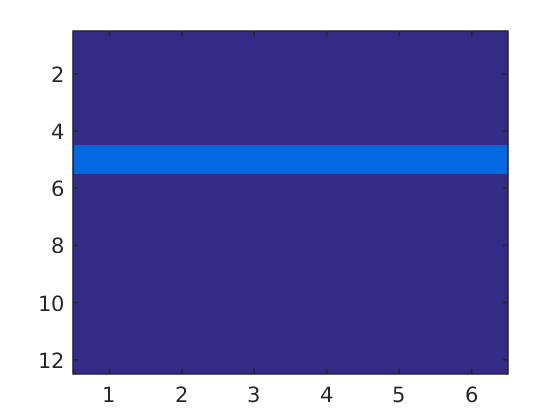

x =

  Columns 1 through 3

   1.000000000996606   0.999999997238543   1.000000000996586
  -0.000000422743507   0.000000688660434  -0.000000422741716
  -7.999981235670497  -8.000023042958702  -7.999981235713444
  -0.000318763424371   0.000298011982253  -0.000318762940855
  10.669430797197750  10.664704173062564  10.669430794126793
  -0.013820293275454   0.007528684800042  -0.013820281228169
  -5.647075613605741  -5.707651123282989  -5.647075644192465
  -0.075316047731145   0.035692360688156  -0.075315996546724
   1.693606989499462   1.562368099783118   1.693606933430848
   0.006032090580723   0.102688784283591   0.006032129260623
  -0.374241696197924  -0.414571836884678  -0.374241711442400
   0.088040574812337   0.095321585645189   0.088040577429160

  Columns 4 through 6

   1.000000000996608   1.000000000996606   1.000000000996608
  -0.000000422742988  -0.000000422743507  -0.000000422742993
  -7.999981235687718  -7.999981235670497  -7.999981235687418
  -0.000318763201789  -0.00031876

In [73]:
m=50;
n=12;

t=linspace(0,1,m);
B = fliplr(vander(t));
A = B(1:m,1:n);
b = cos(4*t)';

x = zeros(n,6);

format long;
x(:,1) = linsolve(A,b); % (a)

[Q,R]= mgs(A);
opts.UT = true;
d = Q'*b;
x(:,2) = linsolve(R,d,opts); % (b)
[V, R] = house(A);
d = b;
for k=1:n
    d(k:m,1) = d(k:m,1)-2*V(k:m,k)*V(k:m,k)'*d(k:m,1);
end
x(:,3) = linsolve(R,d,opts); % (c)

[Q,R]= qr(A);
d = Q'*b;
x(:,4) = linsolve(R,d,opts); % (d)

x(:,5) = A\b; %(e)

[U,S,V]=svd(A,0);
x(:,6) = V*((U'*b)./diag(S)); % (f)

x
image(x); % (g)